In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 로드

In [ ]:
import pandas as pd
path = '/content/drive/Shareddrives/엘포인트 홧팅/데이터/'

pred = pd.read_csv(path+"전처리6/pred_XGB.csv")
X_test = pd.read_csv(path+"전처리6/X_test.csv")
demo = pd.read_csv(path+"전처리6/new_demo.csv")
temp = pd.read_csv(path+"전처리6/temp.csv")
pdclac = pd.read_csv(path+'LPOINT_BIG_COMP_04_PD_CLAC.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# # 한글 깨짐 방지
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
# import matplotlib.pyplot as plt

# plt.rc('font', family='NanumBarunGothic')

In [ ]:
X_test.shape

(8266, 29)

In [ ]:
pred.shape

(8266, 32)

In [ ]:
pred.head()

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM,target,Label,Score
0,49796.540037,0.000000,0.020408,0.020408,0.000000,0.020408,0.448980,0.469388,0.020408,0.000000,...,0,1,0,0,14.141682,0.637167,33.810996,0,0,0.8407
1,10801.768515,0.190476,0.047619,0.000000,0.000000,0.000000,0.047619,0.619048,0.000000,0.095238,...,1,0,0,0,25.347198,8.351814,17.922563,0,0,0.9221
2,123989.401373,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.818182,0.000000,0.090909,...,0,0,0,0,17.752927,0.359481,31.331439,0,0,0.9548
3,94332.748331,0.000000,0.086758,0.000000,0.013699,0.027397,0.100457,0.666667,0.054795,0.050228,...,0,1,0,0,0.935807,7.554166,56.247248,0,0,0.9987
4,234485.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0,1,0,0,0.000000,0.000000,21.714145,0,0,0.9903


In [ ]:
X_test.head()

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ma_fem_dv_남성,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM
0,49796.540037,0.000000,0.020408,0.020408,0.000000,0.020408,0.448980,0.469388,0.020408,0.000000,...,0,1,0,0,1,0,0,14.141682,0.637167,33.810996
1,10801.768515,0.190476,0.047619,0.000000,0.000000,0.000000,0.047619,0.619048,0.000000,0.095238,...,1,0,0,1,0,0,0,25.347198,8.351814,17.922563
2,123989.401373,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.818182,0.000000,0.090909,...,0,1,1,0,0,0,0,17.752927,0.359481,31.331439
3,94332.748331,0.000000,0.086758,0.000000,0.013699,0.027397,0.100457,0.666667,0.054795,0.050228,...,0,1,0,0,1,0,0,0.935807,7.554166,56.247248
4,234485.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,1,0,0,0,1,0,0,0.000000,0.000000,21.714145


In [ ]:
demo.head()

,cust,zon_hlv,target,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,...,M,ma_fem_dv_남성,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta
0,M000034966,Z07,0,16571.446308,0.038462,0.000000,0.000000,0.000000,0.000000,0.173077,...,2,0,1,0,0,1,0,0,NaN,NaN
1,M000136117,Z11,0,433479.199112,0.016129,0.040323,0.000000,0.016129,0.000000,0.419355,...,5,0,1,0,1,0,0,0,12.116240,2.636797
2,M000201112,Z17,0,2121.612750,0.000000,0.000000,0.000000,0.000000,0.047619,0.000000,...,1,0,1,0,0,0,1,0,NaN,NaN
3,M000225114,Z17,0,21457.501705,0.005917,0.041420,0.047337,0.000000,0.000000,0.053254,...,4,0,1,0,0,1,0,0,2.989647,1.472691
4,M000261625,Z17,0,157065.019200,0.000000,0.500000,0.000000,0.029412,0.000000,0.102941,...,5,0,1,0,0,1,0,0,8.413015,13.358490


In [ ]:
demo.columns

Index(['cust', 'zon_hlv', 'target', 'buy_std', '대대분류_Baby', '대대분류_Beauty',
       '대대분류_Culture', '대대분류_Electronic', '대대분류_Etc', '대대분류_Fashion',
       '대대분류_Food', '대대분류_Health', '대대분류_Home', '대대분류_Pet', '대대분류_Travel',
       'RedDay', 'TD_Midnight', 'TD_Daybreak', 'TD_Morning', 'TD_Midday',
       'TD_Twilight', 'lpay', 'Recency', 'Frequency', 'Monetary', 'R', 'F',
       'M', 'ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대', 'ages_30대', 'ages_40대',
       'ages_50대', 'ages_60대 이상', 'NSI_beta', 'ILU_beta'],
      dtype='object')

In [ ]:
# X_test에 붙여 예측값을
data = pd.concat([X_test, pred['Label']], axis=1)
data.head()

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM,Label
0,49796.540037,0.000000,0.020408,0.020408,0.000000,0.020408,0.448980,0.469388,0.020408,0.000000,...,1,0,0,1,0,0,14.141682,0.637167,33.810996,0
1,10801.768515,0.190476,0.047619,0.000000,0.000000,0.000000,0.047619,0.619048,0.000000,0.095238,...,0,0,1,0,0,0,25.347198,8.351814,17.922563,0
2,123989.401373,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.818182,0.000000,0.090909,...,1,1,0,0,0,0,17.752927,0.359481,31.331439,0
3,94332.748331,0.000000,0.086758,0.000000,0.013699,0.027397,0.100457,0.666667,0.054795,0.050228,...,1,0,0,1,0,0,0.935807,7.554166,56.247248,0
4,234485.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0.000000,0.000000,21.714145,0


In [ ]:
data.shape

(8266, 30)

In [ ]:
data.columns

Index(['buy_std', '대대분류_Baby', '대대분류_Beauty', '대대분류_Culture',
       '대대분류_Electronic', '대대분류_Etc', '대대분류_Fashion', '대대분류_Food',
       '대대분류_Health', '대대분류_Home', '대대분류_Pet', '대대분류_Travel', 'RedDay',
       'TD_Midnight', 'TD_Daybreak', 'TD_Morning', 'TD_Midday', 'TD_Twilight',
       'lpay', 'ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대', 'ages_30대',
       'ages_40대', 'ages_50대', 'ages_60대 이상', 'NSI_beta', 'ILU_beta', 'RFM',
       'Label'],
      dtype='object')

In [ ]:
demo.columns

Index(['cust', 'zon_hlv', 'target', 'buy_std', '대대분류_Baby', '대대분류_Beauty',
       '대대분류_Culture', '대대분류_Electronic', '대대분류_Etc', '대대분류_Fashion',
       '대대분류_Food', '대대분류_Health', '대대분류_Home', '대대분류_Pet', '대대분류_Travel',
       'RedDay', 'TD_Midnight', 'TD_Daybreak', 'TD_Morning', 'TD_Midday',
       'TD_Twilight', 'lpay', 'Recency', 'Frequency', 'Monetary', 'R', 'F',
       'M', 'ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대', 'ages_30대', 'ages_40대',
       'ages_50대', 'ages_60대 이상', 'NSI_beta', 'ILU_beta'],
      dtype='object')

In [ ]:
# data에 고객 이름을 붙이기
ttemp = pd.merge(demo.drop(['zon_hlv', 'target', 'R', 'F', 'M', 'Recency', 'Frequency', 'Monetary', 'NSI_beta', 'ILU_beta'], axis=1, inplace=False), 
                 data.drop(['NSI_beta', 'ILU_beta'], axis=1), how="right")
ttemp.isnull().sum()

cust               0
buy_std            0
대대분류_Baby          0
대대분류_Beauty        0
대대분류_Culture       0
대대분류_Electronic    0
대대분류_Etc           0
대대분류_Fashion       0
대대분류_Food          0
대대분류_Health        0
대대분류_Home          0
대대분류_Pet           0
대대분류_Travel        0
RedDay             0
TD_Midnight        0
TD_Daybreak        0
TD_Morning         0
TD_Midday          0
TD_Twilight        0
lpay               0
ma_fem_dv_남성       0
ma_fem_dv_여성       0
ages_20대           0
ages_30대           0
ages_40대           0
ages_50대           0
ages_60대 이상        0
RFM                0
Label              0
dtype: int64

In [ ]:
data.head()

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,NSI_beta,ILU_beta,RFM,Label
0,49796.540037,0.000000,0.020408,0.020408,0.000000,0.020408,0.448980,0.469388,0.020408,0.000000,...,1,0,0,1,0,0,14.141682,0.637167,33.810996,0
1,10801.768515,0.190476,0.047619,0.000000,0.000000,0.000000,0.047619,0.619048,0.000000,0.095238,...,0,0,1,0,0,0,25.347198,8.351814,17.922563,0
2,123989.401373,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.818182,0.000000,0.090909,...,1,1,0,0,0,0,17.752927,0.359481,31.331439,0
3,94332.748331,0.000000,0.086758,0.000000,0.013699,0.027397,0.100457,0.666667,0.054795,0.050228,...,1,0,0,1,0,0,0.935807,7.554166,56.247248,0
4,234485.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0.000000,0.000000,21.714145,0


In [ ]:
result = pd.merge(ttemp, data, how="right")
print(result.isnull().sum().sum(), result.shape)

0 (8267, 31)


In [ ]:
result.columns

Index(['cust', 'buy_std', '대대분류_Baby', '대대분류_Beauty', '대대분류_Culture',
       '대대분류_Electronic', '대대분류_Etc', '대대분류_Fashion', '대대분류_Food',
       '대대분류_Health', '대대분류_Home', '대대분류_Pet', '대대분류_Travel', 'RedDay',
       'TD_Midnight', 'TD_Daybreak', 'TD_Morning', 'TD_Midday', 'TD_Twilight',
       'lpay', 'ma_fem_dv_남성', 'ma_fem_dv_여성', 'ages_20대', 'ages_30대',
       'ages_40대', 'ages_50대', 'ages_60대 이상', 'RFM', 'Label', 'NSI_beta',
       'ILU_beta'],
      dtype='object')

In [ ]:
temp.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,vst_dt,hm,time,ymd,RedDay,TD
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning


In [ ]:
pdclac.head()

,pd_c,pd_nm,clac_hlv_nm,clac_mcls_nm
0,PD0001,소파,가구,거실가구
1,PD0002,스툴/리빙의자,가구,거실가구
2,PD0003,탁자,가구,거실가구
3,PD0004,장식장/진열장,가구,거실가구
4,PD0005,기타가구,가구,기타가구


In [ ]:
pdclac.clac_hlv_nm.value_counts()

패션잡화          130
축산물            91
수산물            88
스포츠패션          82
문구/사무용품        72
채소             72
유아동의류          67
과일             58
속옷/양말/홈웨어      56
조미료            51
화장품/뷰티케어       50
생활/주방가전        43
퍼스널케어          39
원예/애완          39
구기/필드스포츠       38
조리식품           38
식기/조리기구        36
과자             36
침구/수예          35
자동차용품          35
아웃도어/레저        34
건강식품           32
출산/육아용품        32
냉장식품           32
주방잡화           32
가구             31
완구             31
건해산물           30
청소/세탁/욕실용품     30
여성의류           29
대용식            29
세제/위생          28
영상/음향가전        27
남성의류           26
건강용품           25
음료             24
테넌트/음식점        22
주류             22
시즌스포츠          22
인테리어/조명        21
커피/차           20
냉동식품           20
헬스/피트니스        15
양곡             15
서적/음반/악기       15
공구/안전용품        15
계절가전           15
컴퓨터            14
병통조림           14
생활/렌탈서비스       13
냉장/세탁가전        12
상품권            10
유제품             9
기타(비상품)         7
담배              6
여행/레저서비스  

In [ ]:
temp = pd.merge(temp, pdclac[['pd_c', 'clac_hlv_nm']], on="pd_c", how="left")
temp.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,vst_dt,hm,time,ymd,RedDay,TD,clac_hlv_nm
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning,남성의류
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning,주방잡화
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning,남성의류
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning,남성의류
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning,남성의류


In [ ]:
# 제휴사의 경우 대분류가 나와있지 않으므로 제휴사 업종명으로 대체
temp.loc[temp.cop_c.str.contains('B'), "clac_hlv_nm"] = "숙박"
temp.loc[temp.cop_c.str.contains('C'), "clac_hlv_nm"] = "엔터테인먼트"
temp.loc[temp.cop_c.str.contains('D'), "clac_hlv_nm"] = "F&B"
temp.loc[temp.cop_c.str.contains('E'), "clac_hlv_nm"] = "렌탈"

In [ ]:
temp.clac_hlv_nm.isnull().sum()

0

# customized targeting strategies for category coupons to maximize CLV and minimize Cost

coupon은 단기 전략이지만

1) covid 19로 인해 재정 절약의 필요성 + 단기 promotion 이후에도 substantial increase in purchasing 

2) CLV로 장기 고객 가치또한 고려하여 장기 마케팅 가능성을 염두

# Household Segments : K-means

예측값, 예측 확률 빼고 K-means

In [ ]:
# K-means 전 scaling
from sklearn.preprocessing import MinMaxScaler
clus_data = MinMaxScaler().fit_transform(result.drop(['cust', 'Label'], axis=1, inplace=False))

In [ ]:
clus_data = pd.DataFrame(clus_data, columns = result.drop(['cust', 'Label'], axis=1, inplace=False).columns)
clus_data.head()

,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,대대분류_Home,...,ma_fem_dv_남성,ma_fem_dv_여성,ages_20대,ages_30대,ages_40대,ages_50대,ages_60대 이상,RFM,NSI_beta,ILU_beta
0,0.007101,0.000000,0.020408,0.020408,0.000000,0.020408,0.448980,0.469388,0.025118,0.000000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.394563,0.317077,0.022755
1,0.001540,0.190476,0.047619,0.000000,0.000000,0.000000,0.047619,0.619048,0.000000,0.095238,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.091671,0.568321,0.298273
2,0.017682,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.818182,0.000000,0.090909,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.347294,0.398047,0.012838
3,0.013452,0.000000,0.086758,0.000000,0.013699,0.027397,0.100457,0.666667,0.067439,0.050228,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.822282,0.020982,0.269786
4,0.033439,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.163952,0.000000,0.000000


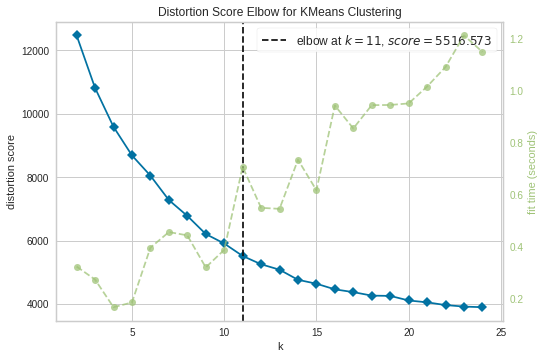

In [ ]:
# K-means
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2, 25))
visualizer.fit(clus_data)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters = 11, random_state = 123).fit(clus_data)
result['segment'] = kmeans.labels_

result['segment'].value_counts().sort_index()

0      458
1     1181
2      857
3      882
4      733
5     1131
6      688
7      763
8      731
9      320
10     523
Name: segment, dtype: int64

# cluster 분류

churn, frequency, loyalty 정도에 따라

*   churn : churning & infrequent customers
*   multi-store customers : frequent but low loyalty
*   single-store customers : frequent and high loyalty

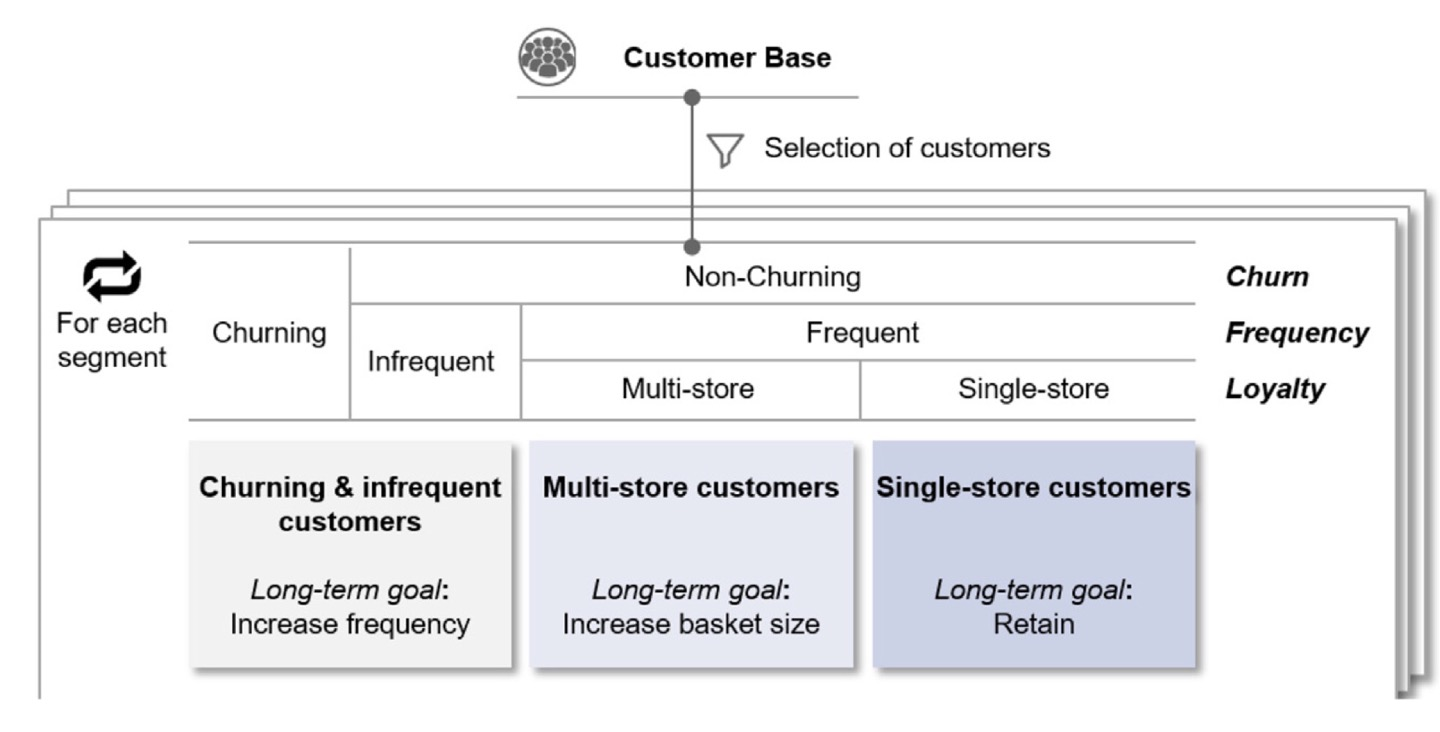

## churn&infrequent customer

In [ ]:
# segment 별 churn customer
import numpy as np

result['cluster'] = np.nan
result.loc[result.Label==1, 'cluster'] = "churn"

In [ ]:
# segment 별 infrequent customer
# frequent 기준 : 최소 두 달에 한 번씩 물건을 구매
temp['hm'] = temp.de_hr.apply(lambda x : str(x)+':00')
temp['time'] = temp.de_dt.map(str)+' '+temp.hm.map(str)
temp['time'] = pd.to_datetime(temp['time'], format="%Y%m%d %H:%M")

In [ ]:
buy_sort = temp[['cust', 'time']].drop_duplicates().sort_values(by=['cust', 'time'], ascending=True)
buy_diff = temp[['cust', 'time']].drop_duplicates().sort_values(by=['cust', 'time'], ascending=True).groupby('cust', as_index=False)['time'].diff()
buy_diff['time'] = buy_diff.time.dt.total_seconds()/(3600*24)
PI = pd.concat([buy_sort, buy_diff], axis=1)
PI.columns = ['cust', 'ymd', 'PI']
PI.head()

,cust,ymd,PI
24008,M000034966,2021-01-16 18:00:00,NaN
3987589,M000034966,2021-01-16 21:00:00,0.125000
1354435,M000034966,2021-03-25 13:00:00,67.666667
1376196,M000034966,2021-03-28 21:00:00,3.333333
2020079,M000034966,2021-06-29 13:00:00,92.666667


In [ ]:
# 평균 거래일이 60일 이상인 경우 : infrequent
uu = PI.groupby('cust', as_index=False)['PI'].mean()
infreq_cust = uu.loc[uu.PI>60, 'cust']
result.loc[result.cust.isin(infreq_cust), "cluster"] = "churn"

## multi/single store customer

대분류 구매 종류 count한 후, 해당 값이 음이항분포를 따른다고 가정. 각 segment별 Q2를 기준으로 multi와 single 분류.

(이론상 포아송 분포를 가정하는 게 옳으나, 포아송 분포를 real data애 적용하면 과대산포 문제가 종종 발생할 수 있어 음이항 분포를 가정)

In [ ]:
cust_ncat = temp.groupby('cust', as_index=False)['clac_hlv_nm'].nunique()
cust_ncat.rename(columns = {'clac_hlv_nm' : 'ncat'}, inplace=True)
cust_ncat.head()

,cust,ncat
0,M000034966,16
1,M000136117,29
2,M000201112,9
3,M000225114,22
4,M000261625,13


In [ ]:
# 고객별 number of categories 구하기
result = pd.merge(result, cust_ncat, on='cust')
result.head()

,cust,buy_std,대대분류_Baby,대대분류_Beauty,대대분류_Culture,대대분류_Electronic,대대분류_Etc,대대분류_Fashion,대대분류_Food,대대분류_Health,...,ages_40대,ages_50대,ages_60대 이상,RFM,Label,NSI_beta,ILU_beta,segment,cluster,ncat
0,M906949129,49796.540037,0.000000,0.020408,0.020408,0.000000,0.020408,0.448980,0.469388,0.020408,...,1,0,0,33.810996,0,14.141682,0.637167,8,NaN,13
1,M656915396,10801.768515,0.190476,0.047619,0.000000,0.000000,0.000000,0.047619,0.619048,0.000000,...,0,0,0,17.922563,0,25.347198,8.351814,4,churn,12
2,M058727711,123989.401373,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.818182,0.000000,...,0,0,0,31.331439,0,17.752927,0.359481,6,NaN,6
3,M266498486,94332.748331,0.000000,0.086758,0.000000,0.013699,0.027397,0.100457,0.666667,0.054795,...,1,0,0,56.247248,0,0.935807,7.554166,1,NaN,31
4,M316585475,234485.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000,0.000000,0.000000,...,1,0,0,21.714145,0,0.000000,0.000000,3,NaN,2


In [ ]:
# fit_nbinom 라이브러리가 작동하지 않아 코드 제작자의 원코드를 따옴. free software여서 사용 가능.
# This program is free software: you can redistribute it and/or modify

from __future__ import print_function

import numpy as np
from scipy.special import gammaln
from scipy.special import psi
from scipy.special import factorial
from scipy.optimize import fmin_l_bfgs_b as optim

import sys


def fit_nbinom(X, initial_params=None):
    infinitesimal = np.finfo(np.float).eps

    def log_likelihood(params, *args):
        r, p = params
        X = args[0]
        N = X.size

        #MLE estimate based on the formula on Wikipedia:
        result = np.sum(gammaln(X + r)) \
            - np.sum(np.log(factorial(X))) \
            - N*(gammaln(r)) \
            + N*r*np.log(p) \
            + np.sum(X*np.log(1-(p if p < 1 else 1-infinitesimal)))

        return -result

    def log_likelihood_deriv(params, *args):
        r, p = params
        X = args[0]
        N = X.size

        pderiv = (N*r)/p - np.sum(X)/(1-(p if p < 1 else 1-infinitesimal))
        rderiv = np.sum(psi(X + r)) \
            - N*psi(r) \
            + N*np.log(p)

        return np.array([-rderiv, -pderiv])

    if initial_params is None:
        #reasonable initial values (from fitdistr function in R)
        m = np.mean(X)
        v = np.var(X)
        size = (m**2)/(v-m) if v > m else 10

        #convert mu/size parameterization to prob/size
        p0 = size / ((size+m) if size+m != 0 else 1)
        r0 = size
        initial_params = np.array([r0, p0])

    bounds = [(infinitesimal, None), (infinitesimal, 1)]
    optimres = optim(log_likelihood,
                     x0=initial_params,
                     #fprime=log_likelihood_deriv,
                     args=(X,),
                     approx_grad=1,
                     bounds=bounds)

    params = optimres[0]
    return {'size': params[0], 'prob': params[1]}

In [ ]:
from scipy.stats import nbinom

ncat_median = []
for i in range(11):
  x = result.loc[result.segment==i, "ncat"]
  ncat_median.append(nbinom.ppf(0.5, n = fit_nbinom(x)['size'], p = fit_nbinom(x)['prob']))

ncat_median

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


[15.0, 16.0, 14.0, 16.0, 15.0, 19.0, 11.0, 16.0, 25.0, 8.0, 23.0]

In [ ]:
for i in range(11):  
  result.loc[(result.segment==i) & (result.cluster.isnull()) & (result.ncat<=ncat_median[i]), "cluster"] = "multi"
  result.loc[(result.segment==i) & (result.cluster.isnull()) & (result.ncat>ncat_median[i]), "cluster"] = "single"

In [ ]:
result.cluster.value_counts()

single    4295
multi     2077
churn     1895
Name: cluster, dtype: int64

In [ ]:
# single customer는 cross coupon 적용이 해당 안 됨

# CLV 계산

In [ ]:
# n_hj : size of each household segment h and customer cluster j
n_hj = pd.crosstab(result.segment, result.cluster)
n_hj

cluster,churn,multi,single
segment,,,
0,118,105,235
1,289,256,636
2,238,187,432
3,209,200,473
4,187,154,392
5,236,318,577
6,186,156,346
7,208,202,353
8,61,253,417


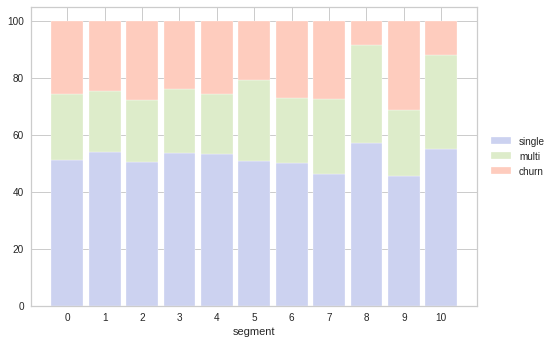

In [ ]:
# 시각화
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
# From raw value to percentage
r = range(0, 11)
totals = [i+j+k for i,j,k in zip(n_hj.churn, n_hj.multi, n_hj.single)]
Bars1 = [i / j * 100 for i,j in zip(n_hj.single, totals)]
Bars2 = [i / j * 100 for i,j in zip(n_hj.multi, totals)]
Bars3 = [i / j * 100 for i,j in zip(n_hj.churn, totals)]
 
# plot
barWidth = 0.85
names = range(0, 11)
plt.bar(r, Bars1, color='#CCD2F0', edgecolor='white', width=barWidth)
plt.bar(r, Bars2, bottom=Bars1, color='#DDECCA', edgecolor='white', width=barWidth)
plt.bar(r, Bars3, bottom=[i+j for i,j in zip(Bars1, Bars2)], color='#FECCBE', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("segment")
 
# Show graphic
plt.legend(labels = ['single', 'multi', 'churn'], bbox_to_anchor=(1.01,0.5), loc='center left')
plt.show()

In [ ]:
# E_hj : average amount spent per transaction
ttemp = pd.merge(temp, result[['cust', 'segment', 'cluster']], on="cust", how="left")

E_hj = round(ttemp.groupby(['segment', 'cluster'], as_index=False)['buy_am'].mean(), 2).pivot_table(index='segment', columns='cluster', values='buy_am')
E_hj

cluster,churn,multi,single
segment,,,
0.0,17896.23,29232.50,16826.07
1.0,17490.94,40953.57,14626.77
2.0,17864.06,40521.82,18856.76
3.0,14860.46,31246.20,23966.10
4.0,17419.62,35906.28,25399.65
5.0,16417.52,33372.39,23074.52
6.0,25420.64,43878.25,23505.52
7.0,18413.64,83947.29,22264.79
8.0,20726.69,33757.07,26640.06


In [ ]:
# N_hj : average number of transactions per year (purchase frequency)

N_hj = ttemp.groupby(['segment', 'cluster'], as_index=False)['rct_no'].count().pivot_table(index='segment', columns='cluster', values='rct_no')
N_hj

cluster,churn,multi,single
segment,,,
0.0,5330,5878,78313
1.0,16119,11658,174319
2.0,10801,6212,85865
3.0,10239,10320,140572
4.0,7424,6833,93355
5.0,17944,20064,166463
6.0,4960,2832,49943
7.0,11515,9807,97663
8.0,7487,30667,170063


## conversion parameters 구하기 위한 purchase frequency (pf), purchase difference (pd) 계산

store 전략은 특정 category를 대상으로 marketing하는 것이 아니므로 구할 필요 없음. reward와 cross-selling만 계산

### strategy : reward

In [ ]:
# reward의 pf : distinctive category의 purchase frequency
r_best_cat = ttemp.groupby(['segment', 'cluster'], as_index=False)['clac_hlv_nm'].agg(pd.Series.mode).pivot_table(index='segment', columns='cluster', values='clac_hlv_nm', aggfunc=lambda x: ' '.join(x))
r_best_cat

cluster,churn,multi,single
segment,,,
0.0,과자,주류,과자
1.0,채소,F&B,과자
2.0,과자,F&B,과자
3.0,과자,F&B,과자
4.0,채소,F&B,과자
5.0,채소,채소,채소
6.0,F&B,F&B,과자
7.0,채소,채소,채소
8.0,과자,과자,과자


In [ ]:
# cluster를 숫자로 바꾼 데이터
temp_clus_num = ttemp.replace({'churn':0, 'multi':1, 'single':2}, inplace=False)
temp_clus_num.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,vst_dt,hm,time,ymd,RedDay,TD,clac_hlv_nm,segment,cluster
0,M430112881,A01000001113,1,A01,A010039,PD0290,20210101,10,15000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning,남성의류,5.0,2.0
1,M646853852,A01000002265,1,A01,A010025,PD1369,20210101,10,79700.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning,주방잡화,1.0,2.0
2,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning,남성의류,5.0,2.0
3,M430112881,A01000003148,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning,남성의류,5.0,2.0
4,M430112881,A01000004946,1,A01,A010039,PD0290,20210101,10,19000.0,1.0,NaN,10:00,2021-01-01 10:00:00,2021-01-01 00:00:00,1,Morning,남성의류,5.0,2.0


In [ ]:
# purchase frequency of promoted category 
reward_pf = pd.DataFrame(np.zeros([11, 3]))
for h in range(11): # household segment (0~10)
  for j in range(3): # cluster (churn, multi, single)
    reward_pf.iloc[h, j] = temp_clus_num[(temp_clus_num.clac_hlv_nm==r_best_cat.iloc[h, j]) & (temp_clus_num.segment==h) & (temp_clus_num.cluster==j)].shape[0]/N_hj.iloc[h, j]

reward_pf

,0,1,2
0,0.086867,0.108540,0.101822
1,0.100254,0.114514,0.109959
2,0.094436,0.137315,0.112735
3,0.114367,0.105233,0.105576
4,0.088227,0.121030,0.098977
5,0.108449,0.078848,0.114055
6,0.093548,0.236582,0.089802
7,0.137820,0.082186,0.148869
8,0.092961,0.089803,0.105232
9,0.100348,0.246644,0.095507


In [ ]:
# purchase difference of promoted category (single은 pf==pd)
reward_pd = pd.DataFrame(np.zeros([11, 3]))
for h in range(11):
  reward_pd.iloc[h, 0] = ttemp[(ttemp.clac_hlv_nm==r_best_cat.iloc[h, 0]) & (ttemp.segment==h) & (ttemp.cluster=="churn")].shape[0]/N_hj.iloc[h, 0] - ttemp[(ttemp.clac_hlv_nm==r_best_cat.iloc[h, 0]) & (ttemp.segment==h) & (ttemp.cluster=="single")].shape[0]/N_hj.iloc[h, 2]
  reward_pd.iloc[h, 1] = ttemp[(ttemp.clac_hlv_nm==r_best_cat.iloc[h, 1]) & (ttemp.segment==h) & (ttemp.cluster=="multi")].shape[0]/N_hj.iloc[h, 2] - ttemp[(ttemp.clac_hlv_nm==r_best_cat.iloc[h, 1]) & (ttemp.segment==h) & (ttemp.cluster=="single")].shape[0]/N_hj.iloc[h, 2]
  reward_pd.iloc[h, 2] = -reward_pf.iloc[h, 2] 

reward_pd 

,0,1,2
0,-0.014955,-0.056325,-0.101822
1,-0.002075,-0.017577,-0.109959
2,-0.018299,-0.014639,-0.112735
3,0.008791,-0.019805,-0.105576
4,0.020240,-0.030143,-0.098977
5,-0.005607,-0.104552,-0.114055
6,0.040248,-0.039885,-0.089802
7,-0.011049,-0.140616,-0.148869
8,-0.012270,-0.089038,-0.105232
9,0.021402,-0.021595,-0.095507


In [ ]:
# reward e (category expected expenditure)
reward_e = pd.DataFrame(np.zeros([11, 3]))
for h in range(11): # household segment (0~10)
  for j in range(3): # cluster (churn, multi, single)
    reward_e.iloc[h, j] = round(np.mean(temp_clus_num.loc[(temp_clus_num.clac_hlv_nm==r_best_cat.iloc[h, j]) & (temp_clus_num.segment==h) & (temp_clus_num.cluster==j), "buy_am"]), 2)

reward_e

,0,1,2
0,3349.18,3553.67,3366.27
1,2757.74,11438.19,3016.09
2,4415.88,9833.86,3032.81
3,3124.33,9956.16,3370.14
4,2983.87,9152.08,3128.17
5,3362.06,2898.24,3230.71
6,8403.04,8365.28,3628.70
7,2971.55,7335.86,3450.52
8,3438.64,3528.88,3555.64
9,2512.57,11302.38,2917.82


### strategy : cross-selling

In [ ]:
# h별로 multi랑 single에서 pf 가장 차이 많이 나는 대분류 구해서 pf, pd 내보내기
import pandas as pd
cross_multi = pd.DataFrame(np.zeros([11, 4]), index=range(11), columns = ["pd", "pf", "cat", "e"])
for h in range(11):
  purchase_ratio = []
  purchase_d = []
  purchase_f = []
  cat = []
  for i in list(ttemp.clac_hlv_nm.unique()):
    kk = ttemp[(ttemp.clac_hlv_nm==i) & (ttemp.segment==h) & (ttemp.cluster=="multi")].shape[0]/N_hj.iloc[h, 1]
    ll = ttemp[(ttemp.clac_hlv_nm==i) & (ttemp.segment==h) & (ttemp.cluster=="single")].shape[0]/N_hj.iloc[h, 2]
    if kk!=0:
      purchase_ratio.append((ll-kk)/kk)
      purchase_d.append(ll-kk)
      purchase_f.append(kk)
      cat.append(i)
  max_pd = max(purchase_ratio)
  cross_multi.iloc[h, 0] = purchase_d[purchase_ratio.index(max_pd)]
  cross_multi.iloc[h, 1] = purchase_f[purchase_ratio.index(max_pd)]
  cross_multi.iloc[h, 2] = cat[purchase_ratio.index(max_pd)]
  cross_multi.iloc[h, 3] = round(ttemp.loc[(ttemp.clac_hlv_nm==cat[purchase_ratio.index(max_pd)]) & (ttemp.segment==h) & (ttemp.cluster=="multi"), "buy_am"].mean(), 2)

cross_multi

,pd,pf,cat,e
0,0.005257,0.000681,원예/애완,8700.00
1,0.002107,0.000515,공구/안전용품,6135.00
2,0.006388,0.000483,병통조림,7833.33
3,0.002161,0.000194,유아식품,7940.00
4,0.003442,0.000146,원예/애완,5000.00
5,0.000519,0.000100,렌탈,52960.00
6,0.003992,0.000353,병통조림,4900.00
7,0.001313,0.000510,인테리어/조명,7978.00
8,0.001457,0.000489,출산/육아용품,19547.33
9,0.028895,0.000839,청소/세탁/욕실용품,400.00


In [ ]:
# h별로 churn이랑 전체에서 pf 가장 차이 많이 나는 대분류 구해서 pf, pd 내보내기
import pandas as pd
cross_churn = pd.DataFrame(np.zeros([11, 4]), index=range(11), columns = ["pd", "pf", "cat", "e"])
for h in range(11):
  purchase_ratio = []
  purchase_d = []
  purchase_f = []
  cat = []
  for i in list(ttemp.clac_hlv_nm.unique()):
    kk = ttemp[(ttemp.clac_hlv_nm==i) & (ttemp.segment==h) & (ttemp.cluster=="churn")].shape[0]/N_hj.iloc[h, 1]
    ll = ttemp[(ttemp.clac_hlv_nm==i) & (ttemp.segment==h)].shape[0]/sum(N_hj.iloc[h, :])
    if kk!=0:
      purchase_ratio.append((ll-kk)/kk)
      purchase_d.append(ll-kk)
      purchase_f.append(kk)
      cat.append(i)
  max_pd = max(purchase_ratio)
  cross_churn.iloc[h, 0] = purchase_d[purchase_ratio.index(max_pd)]
  cross_churn.iloc[h, 1] = purchase_f[purchase_ratio.index(max_pd)]
  cross_churn.iloc[h, 2] = cat[purchase_ratio.index(max_pd)]
  cross_churn.iloc[h, 3] = round(np.mean(ttemp.loc[(ttemp.clac_hlv_nm==cat[purchase_ratio.index(max_pd)]) & (ttemp.segment==h) & (ttemp.cluster=="churn"), "buy_am"]), 2)

cross_churn

,pd,pf,cat,e
0,0.002807,0.000510,생활/렌탈서비스,83.33
1,0.000708,0.000515,구기/필드스포츠,47633.33
2,0.000626,0.000161,시즌스포츠,18320.00
3,0.000475,0.000388,가구,184975.00
4,0.003833,0.000293,생활/렌탈서비스,750.00
5,0.000302,0.000050,냉장/세탁가전,780000.00
6,0.003171,0.001766,상품권,22040.00
7,0.001376,0.000204,숙박,101211.50
8,0.001136,0.000098,유아식품,8766.67
9,0.006232,0.002517,생활/렌탈서비스,64300.00


In [ ]:
# retailer aims to select categories on a segment level that are distinctive for a household segment or that generated large increase in category spending during previous promotions.
# we focus on the "distinctive category" selection because it can be easily computed for every household segment and category
# (the necessary data on past promotions for the "category lift" policy is not available for each customer cluster) >> 이걸 마케팅 2에서 구현
# so in each household segment, we suppose that the most distinctive category is offered as a reward promotion.

In [ ]:
# For cross-selling promotions targeted at multi-store customers, we select the category with the largest (weighted) purchase frequency difference between single- and multi-store customers in their respective household segment.
# This weighted purchase frequency between of a cagegory, pd_hij, is calcuated by twice substrating the category's purchase frequency(pf_hij) from the frequency of single-store customers' purchases in this category/
# In other words, we choose the cagegories with the greatest potential for convincing customer to become loyal.
# In the case of cross-selling promotion aimed at churning and infrequent customers, the same procedure applies but using the average purchase frequency of this customer cluster instead of that of multi-store customers.

In [ ]:
# redemption rate 정의  household segment / SCR / churn, multi, single
r_hij = np.zeros([11, 3, 3])

# store
r_hij[:, 0, :] = 0.15 

# cross-selling
r_hij[:, 1, 0] = cross_churn.pf.values # churn
r_hij[:, 1, 1] = cross_multi.pf.values # multi
r_hij[:, 1, 2] = 0 # single에 cross selling 전략은 불가능

# reward
r_hij[:, 2, :] = reward_pf.values 

r_hij

array([[[1.50000000e-01, 1.50000000e-01, 1.50000000e-01],
        [5.10377679e-04, 6.80503573e-04, 0.00000000e+00],
        [8.68667917e-02, 1.08540320e-01, 1.01822175e-01]],

       [[1.50000000e-01, 1.50000000e-01, 1.50000000e-01],
        [5.14668039e-04, 5.14668039e-04, 0.00000000e+00],
        [1.00254358e-01, 1.14513639e-01, 1.09959327e-01]],

       [[1.50000000e-01, 1.50000000e-01, 1.50000000e-01],
        [1.60978751e-04, 4.82936252e-04, 0.00000000e+00],
        [9.44357004e-02, 1.37314874e-01, 1.12735107e-01]],

       [[1.50000000e-01, 1.50000000e-01, 1.50000000e-01],
        [3.87596899e-04, 1.93798450e-04, 0.00000000e+00],
        [1.14366637e-01, 1.05232558e-01, 1.05575790e-01]],

       [[1.50000000e-01, 1.50000000e-01, 1.50000000e-01],
        [2.92697205e-04, 1.46348602e-04, 0.00000000e+00],
        [8.82273707e-02, 1.21030294e-01, 9.89770232e-02]],

       [[1.50000000e-01, 1.50000000e-01, 1.50000000e-01],
        [4.98405104e-05, 9.96810207e-05, 0.00000000e+00],
    

In [ ]:
# delta_N 
delta_N = np.zeros([11, 3, 3])

# store
delta_N[:, 0, :] = 0.04/6

# cross-selling
delta_N[:, 1, 0] = cross_churn.pf.values*0.04/6 # churn
delta_N[:, 1, 1] = cross_multi.pf.values*0.04/6 # multi
delta_N[:, 1, 2] = 0 # single에 cross selling 전략은 불가능

# reward
delta_N[:, 2, :] = reward_pf.values*0.04/6 

delta_N

array([[[6.66666667e-03, 6.66666667e-03, 6.66666667e-03],
        [3.40251786e-06, 4.53669048e-06, 0.00000000e+00],
        [5.79111945e-04, 7.23602132e-04, 6.78814501e-04]],

       [[6.66666667e-03, 6.66666667e-03, 6.66666667e-03],
        [3.43112026e-06, 3.43112026e-06, 0.00000000e+00],
        [6.68362388e-04, 7.63424258e-04, 7.33062183e-04]],

       [[6.66666667e-03, 6.66666667e-03, 6.66666667e-03],
        [1.07319167e-06, 3.21957502e-06, 0.00000000e+00],
        [6.29571336e-04, 9.15432496e-04, 7.51567383e-04]],

       [[6.66666667e-03, 6.66666667e-03, 6.66666667e-03],
        [2.58397933e-06, 1.29198966e-06, 0.00000000e+00],
        [7.62444249e-04, 7.01550388e-04, 7.03838602e-04]],

       [[6.66666667e-03, 6.66666667e-03, 6.66666667e-03],
        [1.95131470e-06, 9.75657349e-07, 0.00000000e+00],
        [5.88182471e-04, 8.06868628e-04, 6.59846821e-04]],

       [[6.66666667e-03, 6.66666667e-03, 6.66666667e-03],
        [3.32270069e-07, 6.64540138e-07, 0.00000000e+00],
    

In [ ]:
# delta_E 
delta_E = np.zeros([11, 3, 3])

# store
delta_E[:, 0, :] = 0.01/3

# cross-selling
delta_E[:, 1, 0] = np.where(cross_churn.pd.values>0, cross_churn.pd.values, 0)  # churn
delta_E[:, 1, 1] = np.where(cross_multi.pd.values>0, cross_multi.pd.values, 0)  # multi
delta_E[:, 1, 2] = 0 # single에 cross selling 전략은 불가능

# reward
delta_E[:, 2, :] = np.where(reward_pd.values>0, reward_pd.values, 0)  

delta_E

array([[[0.00333333, 0.00333333, 0.00333333],
        [0.00280728, 0.00525721, 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00333333, 0.00333333, 0.00333333],
        [0.00070752, 0.00210696, 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00333333, 0.00333333, 0.00333333],
        [0.00062636, 0.00638832, 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00333333, 0.00333333, 0.00333333],
        [0.00047506, 0.00216087, 0.        ],
        [0.00879085, 0.        , 0.        ]],

       [[0.00333333, 0.00333333, 0.00333333],
        [0.00383324, 0.0034421 , 0.        ],
        [0.02023958, 0.        , 0.        ]],

       [[0.00333333, 0.00333333, 0.00333333],
        [0.00030229, 0.00051908, 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.00333333, 0.00333333, 0.00333333],
        [0.00317081, 0.00399185, 0.        ],
        [0.04024762, 0.        , 0.        ]],

       [[0.00333333,

In [ ]:
# e_hij : expenditures in the promoted category
# store category 전략의 경우 E_hj 이용
e_hij = np.zeros([11, 3, 3])

# store
e_hij[:, 0, :] = E_hj.values

# cross-selling
e_hij[:, 1, 0] = cross_churn.e.values  # churn
e_hij[:, 1, 1] = cross_churn.e.values  # multi
e_hij[:, 1, 2] = 0 # single에 cross selling 전략은 불가능

# reward
e_hij[:, 2, :] = reward_e.values  

e_hij

array([[[1.789623e+04, 2.923250e+04, 1.682607e+04],
        [8.333000e+01, 8.333000e+01, 0.000000e+00],
        [3.349180e+03, 3.553670e+03, 3.366270e+03]],

       [[1.749094e+04, 4.095357e+04, 1.462677e+04],
        [4.763333e+04, 4.763333e+04, 0.000000e+00],
        [2.757740e+03, 1.143819e+04, 3.016090e+03]],

       [[1.786406e+04, 4.052182e+04, 1.885676e+04],
        [1.832000e+04, 1.832000e+04, 0.000000e+00],
        [4.415880e+03, 9.833860e+03, 3.032810e+03]],

       [[1.486046e+04, 3.124620e+04, 2.396610e+04],
        [1.849750e+05, 1.849750e+05, 0.000000e+00],
        [3.124330e+03, 9.956160e+03, 3.370140e+03]],

       [[1.741962e+04, 3.590628e+04, 2.539965e+04],
        [7.500000e+02, 7.500000e+02, 0.000000e+00],
        [2.983870e+03, 9.152080e+03, 3.128170e+03]],

       [[1.641752e+04, 3.337239e+04, 2.307452e+04],
        [7.800000e+05, 7.800000e+05, 0.000000e+00],
        [3.362060e+03, 2.898240e+03, 3.230710e+03]],

       [[2.542064e+04, 4.387825e+04, 2.350552e+04],


In [ ]:
# dE_hj (alpha=0.025)
E_hj = np.array(E_hj)
dE_hj = np.zeros([11, 3])
alpha = 0.027

# churn
dE_hj[:, 0] = np.where((E_hj[:, 2]+E_hj[:, 1])/2-E_hj[:, 0] > alpha*E_hj[:, 0], (E_hj[:, 2]+E_hj[:, 1])/2-E_hj[:, 0], E_hj[:, 0])

# multi
dE_hj[:, 1] = np.where(E_hj[:, 2]-E_hj[:, 1] > alpha*E_hj[:, 1], E_hj[:, 2]-E_hj[:, 1], alpha*E_hj[:, 1])

# single
dE_hj[:, 2] = E_hj[:, 2]*0.025

dE_hj

array([[ 5133.055  ,   789.2775 ,   420.65175],
       [10299.23   ,  1105.74639,   365.66925],
       [11825.23   ,  1094.08914,   471.419  ],
       [12745.69   ,   843.6474 ,   599.1525 ],
       [13233.345  ,   969.46956,   634.99125],
       [11805.935  ,   901.05453,   576.863  ],
       [ 8271.245  ,  1184.71275,   587.638  ],
       [34692.4    ,  2266.57683,   556.61975],
       [ 9471.875  ,   911.44089,   666.0015 ],
       [ 5580.325  ,   617.0769 ,   467.40275],
       [14559.67   ,  1006.98957,   691.39425]])

In [ ]:
# dN_hj (alpha=0.025)
N_hj = np.array(N_hj)
dN_hj = np.zeros([11, 3])
alpha = 0.027

# churn
dN_hj[:, 0] = np.where((N_hj[:, 2]+N_hj[:, 1])/2-N_hj[:, 0] > alpha*N_hj[:, 0], (N_hj[:, 2]+N_hj[:, 1])/2-N_hj[:, 0], N_hj[:, 0])

# multi
dN_hj[:, 1] = np.where(N_hj[:, 2]-N_hj[:, 1] > alpha*N_hj[:, 1], N_hj[:, 2]-N_hj[:, 1], alpha*N_hj[:, 1])

# single
dN_hj[:, 2] = N_hj[:, 2]*0.025

dN_hj

array([[ 36765.5  ,  72435.   ,   1957.825],
       [ 76869.5  , 162661.   ,   4357.975],
       [ 35237.5  ,  79653.   ,   2146.625],
       [ 65207.   , 130252.   ,   3514.3  ],
       [ 42670.   ,  86522.   ,   2333.875],
       [ 75319.5  , 146399.   ,   4161.575],
       [ 21427.5  ,  47111.   ,   1248.575],
       [ 42220.   ,  87856.   ,   2441.575],
       [ 92878.   , 139396.   ,   4251.575],
       [  9210.5  ,  20063.   ,    531.375],
       [ 49169.5  ,  75275.   ,   2294.6  ]])

In [ ]:
# 전략 cases > for문에 돌릴 수 있도록 숫자로 변환 : S=0, C=1, R=2
rrr = []
for i in range(27):
  rrr.append(int(np.base_repr(i, base=3)) + 111)
rrr = list(map(lambda x : list(str(x)), rrr))
R = (np.array(rrr).reshape(1, -1).astype(int)-1).reshape(-1, 3).tolist()
R

[[0, 0, 0],
 [0, 0, 1],
 [0, 0, 2],
 [0, 1, 0],
 [0, 1, 1],
 [0, 1, 2],
 [0, 2, 0],
 [0, 2, 1],
 [0, 2, 2],
 [1, 0, 0],
 [1, 0, 1],
 [1, 0, 2],
 [1, 1, 0],
 [1, 1, 1],
 [1, 1, 2],
 [1, 2, 0],
 [1, 2, 1],
 [1, 2, 2],
 [2, 0, 0],
 [2, 0, 1],
 [2, 0, 2],
 [2, 1, 0],
 [2, 1, 1],
 [2, 1, 2],
 [2, 2, 0],
 [2, 2, 1],
 [2, 2, 2]]

In [ ]:
single_cross_index = []
for llist in R:
  if llist[2]==1:
    R.pop(R.index(llist)) # single-sore의 cross-selling 삭제
len(R)

18

In [ ]:
# cost
n_hj = np.array(n_hj)
c_f = 0.45 # fixed cost per coupon and customer (redemption-independent)
c_v = 0.045 # variable cost margin per coupon and customer (redemption-dependent)

cost_r = []

for rrr in R:
  cost_temp = []
  for i in rrr:
    for h in range(11):
      for j in range(3):
        cost_temp.append(n_hj[h, j]*(c_f+c_v*(r_hij[h, i, j]*e_hij[h, i, j])))
  cost_r.append(sum(cost_temp))

cost_r

[4302208.524352499,
 3061221.434307063,
 2877871.5672373567,
 1636884.4771919202,
 3061221.434307063,
 1820234.3442616272,
 2877871.5672373567,
 1636884.4771919206,
 1453534.610122214,
 212547.52007677787,
 1636884.4771919206,
 395897.38714648446,
 3061221.434307063,
 1820234.3442616272,
 1636884.4771919206,
 395897.3871464845,
 1820234.3442616272,
 579247.254216191]

In [ ]:
len(cost_r)

18

In [ ]:
# CLV base (gross profit margin=0.3, d=0.12)
gross_profit_margin = 0.3
d = 0.12

CLV_base = pd.DataFrame(n_hj*E_hj*N_hj).sum().sum()*gross_profit_margin/d
CLV_base

31575062464095.58

In [ ]:
# CLV 증가분
dCLV = []
cost_r = np.array(cost_r)

for rrr in R:
  CLV_temp = []
  for i in rrr:
    for h in range(10):
      for j in range(3):
        CLV_temp.append(gross_profit_margin/d*n_hj[h, j]*(E_hj[h, j]+dE_hj[h, j]*delta_E[h, i, j])*(N_hj[h, j]+dN_hj[h, j]*delta_N[h, i, j])-cost_r[R.index(rrr)]) 
  dCLV.append((sum(CLV_temp)-1)/CLV_base)

dCLV

[2.816647691656641,
 2.8116992611102383,
 2.811084024284675,
 2.8061355937382726,
 2.811699261110238,
 2.8067508305638365,
 2.811084024284675,
 2.806135593738272,
 2.805520356912711,
 2.8005719263663074,
 2.8061355937382726,
 2.8011871631918708,
 2.811699261110238,
 2.806750830563836,
 2.8061355937382726,
 2.8011871631918703,
 2.8067508305638347,
 2.8018024000174315]

In [ ]:
len(dCLV)

18

In [ ]:
cost_r

array([4302208.5243525 , 3061221.43430706, 2877871.56723736,
       1636884.47719192, 3061221.43430706, 1820234.34426163,
       2877871.56723736, 1636884.47719192, 1453534.61012221,
        212547.52007678, 1636884.47719192,  395897.38714648,
       3061221.43430706, 1820234.34426163, 1636884.47719192,
        395897.38714648, 1820234.34426163,  579247.25421619])

In [ ]:
R

[[0, 0, 0],
 [0, 0, 2],
 [0, 1, 0],
 [0, 1, 2],
 [0, 2, 0],
 [0, 2, 2],
 [1, 0, 0],
 [1, 0, 2],
 [1, 1, 0],
 [1, 1, 2],
 [1, 2, 0],
 [1, 2, 2],
 [2, 0, 0],
 [2, 0, 2],
 [2, 1, 0],
 [2, 1, 2],
 [2, 2, 0],
 [2, 2, 2]]

In [ ]:
cost_r/100000

array([43.02208524, 30.61221434, 28.77871567, 16.36884477, 30.61221434,
       18.20234344, 28.77871567, 16.36884477, 14.5353461 ,  2.1254752 ,
       16.36884477,  3.95897387, 30.61221434, 18.20234344, 16.36884477,
        3.95897387, 18.20234344,  5.79247254])

In [ ]:
max(dCLV)

2.816647691656641

Text(14.53534610122214, 2.805520356912711, 'CCS')

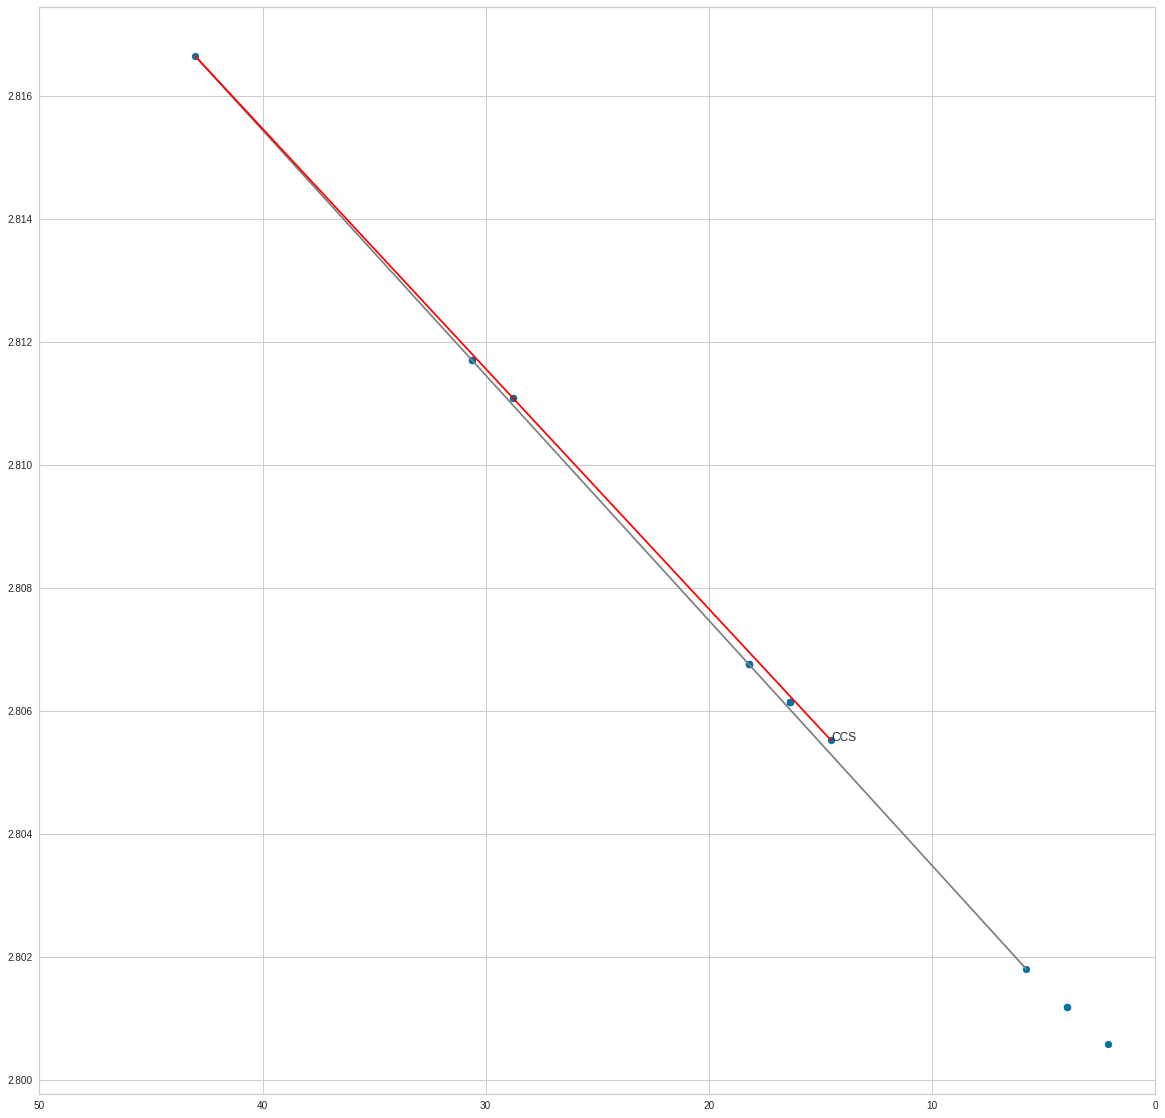

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
cost_adjust = cost_r/100000
# dCLV_adjust = [element*100 for element in dCLV]
plt.scatter(cost_adjust, dCLV)
plt.plot([cost_adjust[0], cost_adjust[17]], [dCLV[0], dCLV[17]], color='gray')
plt.plot([cost_adjust[0], cost_adjust[8]], [dCLV[0], dCLV[8]], color='red')
plt.xlim(50, 0)
# plt.yticks(np.arange(3.001, .0002, 0.0001))
plt.annotate("CCS", (cost_adjust[8], dCLV[8]))
# labels = ["SSS", "SSR", "SCS", "SCR", "SRS", "SRR", "CSS", "CSR", "CCS", "CCR", "CRS", "CRR", "RSS", "RSR", "RCS", "RCR", "RRS", "RRR"]
# for i, label in enumerate(labels):
#   plt.annotate(label, (cost_adjust[i], dCLV[i]))